###  Importing the libraries and loading the data

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../parth/Desktop/immigration-to-canada-ibm-dataset"))


['Canada.xlsx']


In [3]:
df = pd.read_excel('../parth/Desktop/immigration-to-canada-ibm-dataset/Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows = range(20),
                     skipfooter = 2)

# getting the shape of the data
df.shape

(195, 43)

#### Dropping redundant columns


In [4]:
df.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
print("The number of nulls in each column are \n", df.isna().sum())
df.iloc[2].nunique()

The number of nulls in each column are 
 Type        0
Coverage    0
OdName      0
AREA        0
AreaName    0
REG         0
RegName     0
DEV         0
DevName     0
1980        0
1981        0
1982        0
1983        0
1984        0
1985        0
1986        0
1987        0
1988        0
1989        0
1990        0
1991        0
1992        0
1993        0
1994        0
1995        0
1996        0
1997        0
1998        0
1999        0
2000        0
2001        0
2002        0
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
dtype: int64


42

In [6]:
df = df.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1)

# adding a Total column to add more information
df['Total'] = df.sum(axis = 1)

# let's check the head of the cleaned data
df.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [7]:
df['decade1']=df.iloc[:,4:14].sum(axis=1)
df['decade2']=df.iloc[:,14:24].sum(axis=1)
df['decade3']=df.iloc[:,24:34].sum(axis=1)
df['decade4']=df.iloc[:,34:38].sum(axis=1)
df.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2009,2010,2011,2012,2013,Total,decade1,decade2,decade3,decade4
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,1746,1758,2203,2635,2004,58639,3693,15845,30501,8600
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,716,561,539,620,603,15699,9,2568,10799,2323
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,5393,4752,4325,3774,4331,69439,1271,13153,37833,17182
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,0,0,0,6,3,2,1,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,0,1,1,15,2,6,5,2


**Dividing the year data into decades**:-
- decade1= 1980-1989
- decade2= 1990-1999
- decade3= 2000-2009
- decade4= 2010-2013
This will help us understand the inflow of immigrants from across the world to Canada with each passing decade.
Note that decade4 only consists of 3 years of data, but we can still draw some conclusions from it.

In [8]:
df1=df[['AreaName','decade1']].groupby(['AreaName']).sum(axis=1).sum(
    level=['AreaName'])
df2=df[['AreaName','decade2']].groupby(['AreaName']).sum(axis=1).sum(
    level=['AreaName'])
df3=df[['AreaName','decade3']].groupby(['AreaName']).sum(axis=1).sum(
    level=['AreaName'])
df4=df[['AreaName','decade4']].groupby(['AreaName']).sum(axis=1).sum(
    level=['AreaName'])
new_df=pd.merge(df1, df2, how='inner', on = 'AreaName')
new_df=pd.merge(new_df, df3, how='inner', on = 'AreaName')
new_df=pd.merge(new_df, df4, how='inner', on = 'AreaName')
print("Total number of immigrants per decade \n ",new_df)

Total number of immigrants per decade 
                                   decade1  decade2  decade3  decade4
AreaName                                                           
Africa                             48815   148849   268325   152959
Asia                              351025   938744  1409993   618032
Europe                            381738   548435   362703   118071
Latin America and the Caribbean   185975   242802   227574   108797
Northern America                   76824    56931    75173    32214
Oceania                            13096    18430    16812     6836


#### Plotting the immigrants per continent

Now, from the above obtained dataframe, we will plot immigrants from each continent to Canada for each decade.

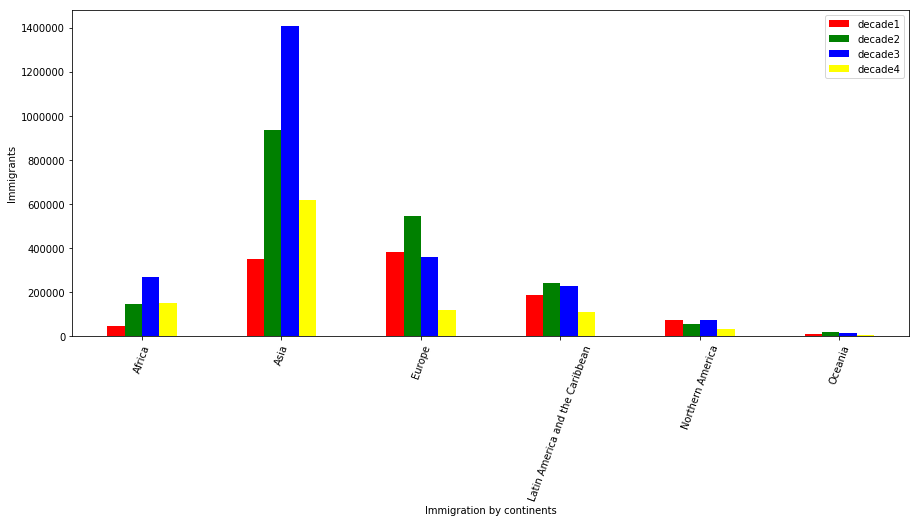

In [9]:
ax2=new_df.plot(kind = 'bar', color=['red', 'green', 'blue','yellow'], figsize = (15,6), rot = 70)
labels = ['decade1','decade2','decade3','decade4']
ax2.legend(labels = labels)
ax2.set_xlabel('Immigration by continents')
ax2.set_ylabel('Immigrants')
plt.show()

- For the **first decade(1980-1989)**, the number of immigrants from **Europe** and **Asia** were almost the **same**.
- For the **second decade(1990-1999)**, we see a sudden **upsurge** in immigrants from **Asia and Europe**. Immigrants from **Latin America and Carribean** also increase a little.
- For the **third decade(2000-2009)** , interestingly we see that number of immigrants from **Asia** almost **double** from the previous decade. Contrastingly, **Europe, Latin America, Northern America and Oceania** show a **decrease** in the immigrants from previous decade.
- For the **fourth incomplete decade(2010-2013)**, we see that **Asia** has already seen half of last decade's number in just 3 years.

#### Stacked representation of Immigrants per continent

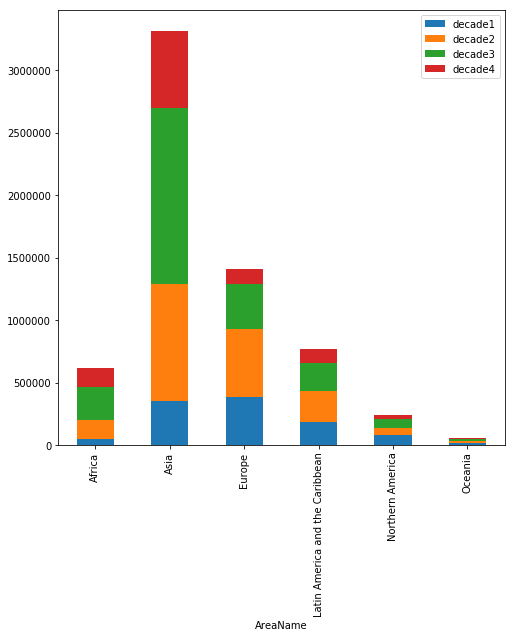

In [10]:
new_df.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

#### Analyzing data by countries

Let us see which countries individually contributed the most to the number of immigrants to Canada.

<Figure size 720x720 with 0 Axes>

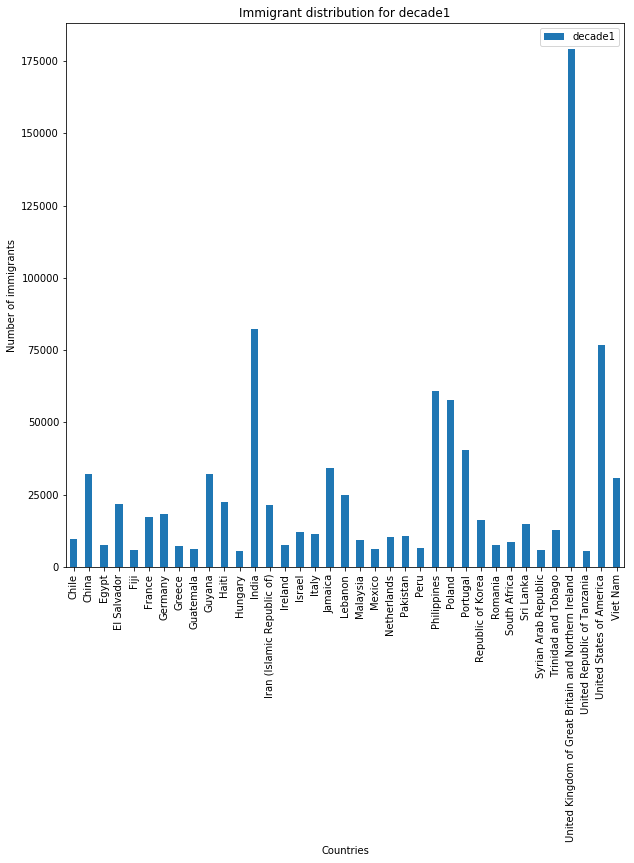

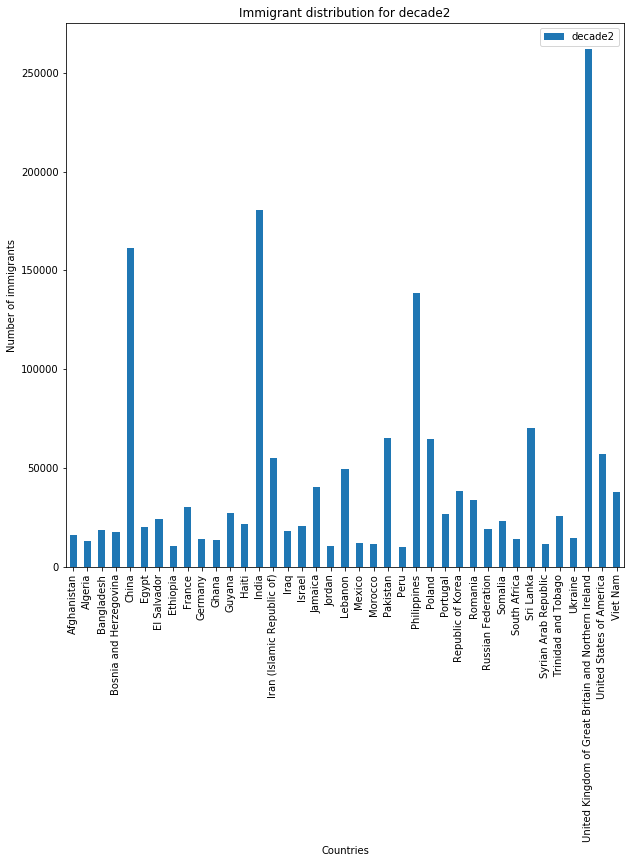

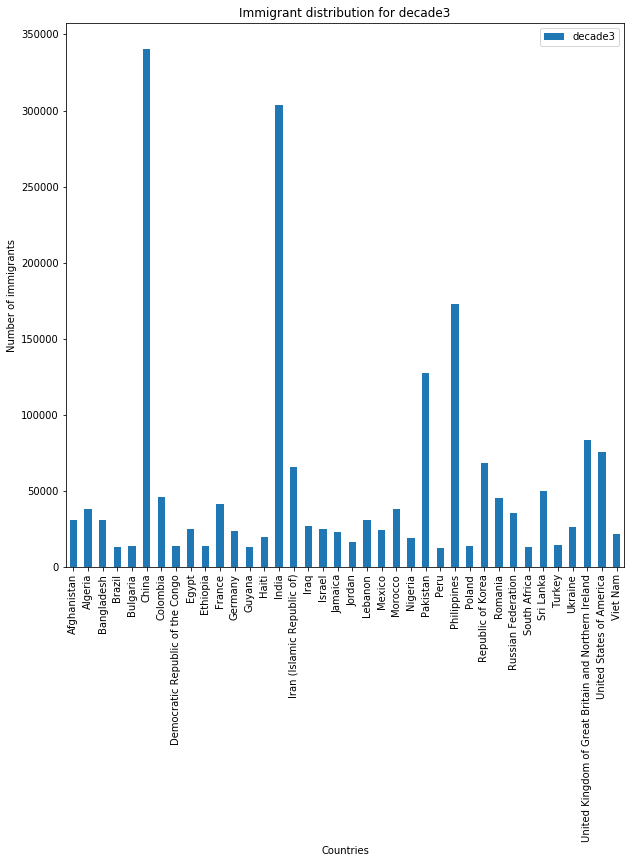

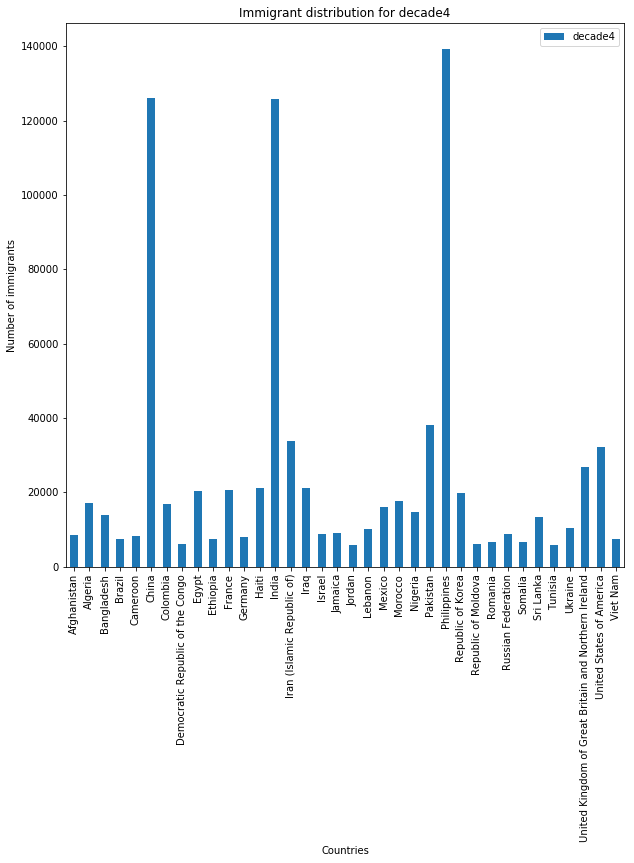

In [11]:
def create_plot(newc,decade):
    newc.plot(kind="bar",figsize=(10, 10))
    plt.ylabel('Number of immigrants')
    plt.xlabel('Countries')
    plt.title('Immigrant distribution for '+decade)
    

decades = ['decade1','decade2','decade3','decade4']
plt.figure(1,figsize=(10, 10))
for decade in decades:
    country=df[['OdName',decade]].groupby(['OdName']).sum(axis=1).sum(level=['OdName'])
    # print(country)
    mean=country.mean()
    newc = country[(country > mean).all(axis=1)]
#     print (newc)
#     indices= decades.index(decade)
#     print(indices+1)
#     plt.subplot(4,1,indices+1)
#     plt.subplots_adjust(hspace=0.9)
    create_plot(newc,decade)

Countries in order of largest immigrants:-

**Great Britain(largest contributor)**, USA, India, Philippines and China for the **first decade**.
**Great Britain(largest contributor)**, India, Philippines and Poland for **second decade**.
**China(largest contributor)**,India, Great Britain, Pakistan, Philippines for **third decade**.
**China(largest contributor)**,India, Pakistan, Philippines for the **fourth decade**.
*Its interesting how the numbers have completely changed for* **China and Great Britain** *over the years!!

Now,lets see the country background of all the immigrants over the years:-

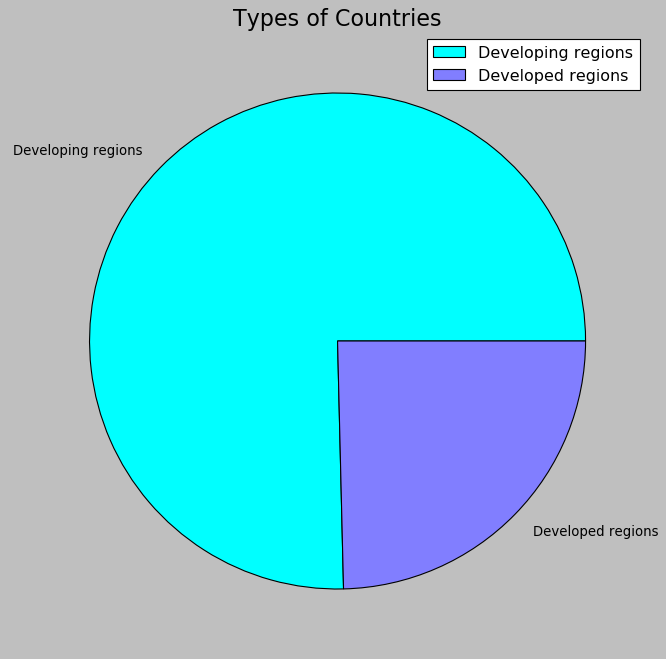

In [12]:
plt.style.use('_classic_test')

colors = plt.cm.cool(np.linspace(0, 50, 100))
df['DevName'].value_counts().plot.pie(colors = colors,
                                       figsize = (10, 10))

plt.title('Types of Countries', fontsize = 20, fontweight = 30)
plt.axis('off')
plt.legend()
plt.show()

- The **developed countries** take almost **25%** of all countries who immigrated to Canada over all the years.
- **This is misleading !** *This chart does not show the total population share of developed countries. It merely shows that of all countries who migrated to Canada , 75% are developing and 25% are developed.*

In [13]:
df1=df[['DevName','decade1']].groupby(['DevName']).sum(axis=1).sum(
    level=['DevName'])
df2=df[['DevName','decade2']].groupby(['DevName']).sum(axis=1).sum(
    level=['DevName'])
df3=df[['DevName','decade3']].groupby(['DevName']).sum(axis=1).sum(
    level=['DevName'])
df4=df[['DevName','decade4']].groupby(['DevName']).sum(axis=1).sum(
    level=['DevName'])
new_df=pd.merge(df1, df2, how='inner', on = 'DevName')
new_df=pd.merge(new_df, df3, how='inner', on = 'DevName')
new_df=pd.merge(new_df, df4, how='inner', on = 'DevName')
print("Background of immigrants per decade \n ",new_df)

Background of immigrants per decade 
                      decade1  decade2  decade3  decade4
DevName                                               
Developed regions    470141   622361   461011   160498
Developing regions   587332  1331830  1899569   876411


<Figure size 800x800 with 0 Axes>

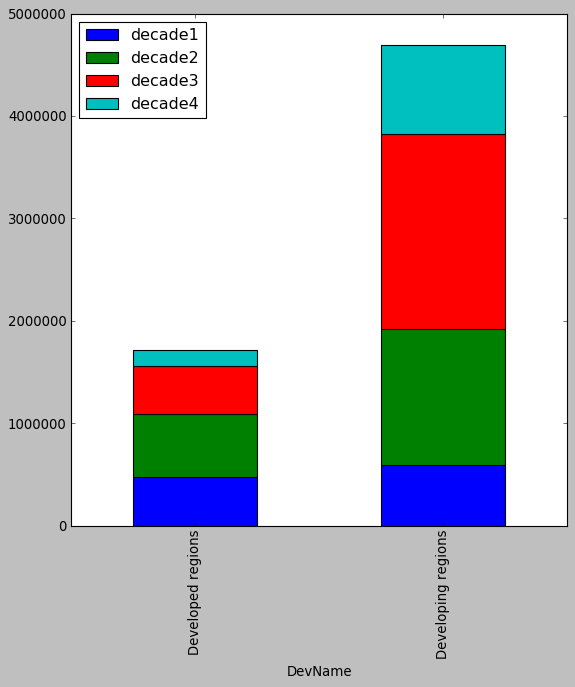

In [14]:
def create_plot2(new_df,decade):
    new_df.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
plt.figure(1,figsize=(10, 10))
create_plot2(new_df,decades)

This graph correctly shows the immigrant population share of developing vs developed countries to Canada.
- Immigrants from developed and developing countries are comparable in first decade.
- The ratio between Developing and Developed immigrants keeps on almost doubling every decade after first decade.

#### Lastly, we should visualise the total immigrants over all the years on the world map.

#### To see the code and plot for the world map please visit my kaggle kernel https://www.kaggle.com/parthsharma5795/o-canada 

### Please upvote and feel free to give any feedback/comment on my kaggle kernel !!